## Pràctica 1: Resolem un problema de classificacio

#### Autores: Adrián González (1636620) y Carlos ()

### PLANIFICACIÓN DE LA PRÁCTICA

1. **Importar bibliotecas y cargar datos**
   - Importar las bibliotecas necesarias (pandas, sklearn, etc.).
   - Cargar los datos del Titanic.

2. **Análisis Exploratorio de Datos (EDA)**
   - Inspeccionar los atributos y sus tipos.
   - Evaluar el atributo objetivo y su distribución.
   - Identificar y tratar los valores faltantes.
   - Calcular correlaciones y visualizarlas.

3. **Preprocesamiento de Datos**
   - Normalizar los datos si es necesario.
   - Manejar valores faltantes (eliminar o imputar).
   - Codificar datos categóricos.
   - Realizar PCA si es apropiado.
   - Seleccionar características si es necesario.
   - Aplicar "PolynomialFeatures" si es útil.

4. **Selección de Métricas**
   - Elegir la métrica de evaluación (accuracy, f1-score, average precision).
   - Crear funciones para visualizar las curvas ROC y PR.
   - Utilizar "classification_report" para obtener métricas detalladas.

5. **Selección de Modelos con Validación Cruzada**
   - Definir los modelos a evaluar (por ejemplo, regresión logística, random forest, KNN, SVM).
   - Realizar validación cruzada para seleccionar el mejor modelo.
   - Realizar búsqueda de hiperparámetros para cada modelo.
   - Comparar los resultados en una tabla.
   - Ajustar la configuración de la validación cruzada y "k".
   - Explorar métodos de búsqueda de hiperparámetros.

6. **Análisis Final**
   - Interpretar las curvas ROC/PR y seleccionar la más relevante.
   - Evaluar las métricas detalladas y definir una métrica principal.
   - Considerar mejoras posibles para el modelo.


 ### 1. Importar bibliotecas y cargar datos 📚

In [147]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as bplt
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [109]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_train = pd.read_csv('train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000,0,0,111369,30.000,C148,C


### 2. Análisis Exploratorio de Datos (EDA) 🔎

**Variables Numéricas:**

    - Calcular estadísticas descriptivas: la media, la mediana, la desviación estándar, el mínimo y el máximo.
    - Visualizar histogramas y boxplots para entender la distribución de los datos.
    - Realizar un análisis de valores atípicos (outliers) para identificar observaciones inusuales.
    - Calcular correlaciones entre las variables numéricas utilizando matrices de correlación y mapas de calor.
    - Crear gráficos de dispersión para explorar relaciones entre pares de variables numéricas.

**Variables Categóricas:**

    - Calcular la frecuencia de cada categoría para comprender la distribución de las variables categóricas.
    - Crear gráficos de barras o gráficos de pastel para visualizar la distribución de categorías.
    - Evaluar la relación entre variables categóricas
    - Realizar análisis de variables categóricas respecto a la variable objetivo.
    - Identificar y manejar categorías raras o poco frecuentes si es necesario.

In [110]:
print("Numero de columnas en el train: ",df_train.shape[1])
print("---------------------------------------")
print("Numero de filas en el train: ",df_train.shape[0])

Numero de columnas en el train:  12
---------------------------------------
Numero de filas en el train:  891


In [111]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None



| Variable    | Tipo        | Descripción                                         |
|------------ |------------ |--------------------------------------------------- |
| passengerId | int         | Valor de identificación único de cada pasajero     |
| name        | string      | Nombre del pasajero                                |
| sex         | factor      | Género (masculino o femenino)                      |
| age         | numeric     | Edad de la persona (niños menores de 12 meses representados en fracción de año) |
| pclass       | factor      | Clase del ticket (1 = 1ra, 2 = 2da, 3 = 3ra)                        |
| embarked    | factor      | Puerto de embarque de las personas                |
| ticket    | numeric     | Número de ticket (NA para la tripulación)         |
| fare        | numeric     | Precio del ticket (NA para la tripulación, músicos, empleados y otros) |
| sibsp       | factor ordenado | Número de hermanos/familiares                  |
| cabin       | factor      | Tipo de cabina ocupada por el pasajero            |
| parch       | factor ordenado | Número de padres e hijos a bordo               |
| survived    | factor 2 de dos niveles | Sobrevive (0 = No, 1 = Si) al hundimiento      |

Variables numéricas: Age, Fare, SibSp, Parch 

Variables categóricas: Survived, Sex, Embarked, Pclass, Name, PassengerId, Ticket, Cabin

In [112]:
def has_nans(df):
  return df.isna().sum().sum()>0

print (has_nans(df_train))

print(pd.isnull(df_train).sum())

# Resumen estadístico de las variables numéricas
print(df_train.describe(include="all"))

True
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
        PassengerId  Survived  Pclass                     Name   Sex     Age  \
count       891.000   891.000 891.000                      891   891 714.000   
unique          NaN       NaN     NaN                      891     2     NaN   
top             NaN       NaN     NaN  Braund, Mr. Owen Harris  male     NaN   
freq            NaN       NaN     NaN                        1   577     NaN   
mean        446.000     0.384   2.309                      NaN   NaN  29.699   
std         257.354     0.487   0.836                      NaN   NaN  14.526   
min           1.000     0.000   1.000                      NaN   NaN   0.420   
25%         223.500     0.000   2.000                      NaN   NaN  20.125   
50%         446.000     0.000   3.

- El total de pasageros es 891
- Así de primeras PassengerId y Ticket no creemos que vayan a ser muy relevantes al ser identificadores únicos, Name y Fare igual (este último por que pclass es equivalentte)

Deberemos tratar algunos NaNs:

- Existen columnas con muchos Nans: Age y Cabin 
- Embarked tiene dos NaNs

Cabin es poco relevante y tiene muchos NaNs
Fusionamos SibSp y Parch en FamSize

In [113]:
df_train['FamSize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_train = df_train.drop(['PassengerId', 'Ticket', 'Name', 'Fare', 'Cabin','SibSp','Parch'], axis=1)

In [114]:
df_train.nunique()

Survived     2
Pclass       3
Sex          2
Age         88
Embarked     3
FamSize      9
dtype: int64

In [115]:
# Resumen estadístico de las variables categóricas
df_train.describe(include='O')

,Sex,Embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


In [116]:
# Resumen estadístico de las variables numéricas
df_train.describe().style.background_gradient()

,Survived,Pclass,Age,FamSize
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,1.904602
std,0.486592,0.836071,14.526497,1.613459
min,0.000000,1.000000,0.420000,1.000000
25%,0.000000,2.000000,20.125000,1.000000
50%,0.000000,3.000000,28.000000,1.000000
75%,1.000000,3.000000,38.000000,2.000000
max,1.000000,3.000000,80.000000,11.000000


<AxesSubplot:>

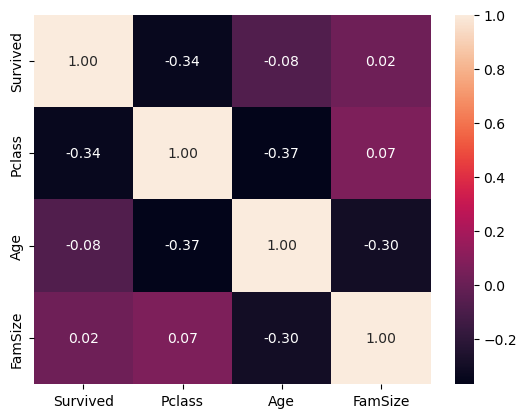

In [117]:
# Calcular la matriz de correlación
sns.heatmap(df_train.corr(),annot = True, fmt = ".2f")


0    549
1    342
Name: Survived, dtype: int64


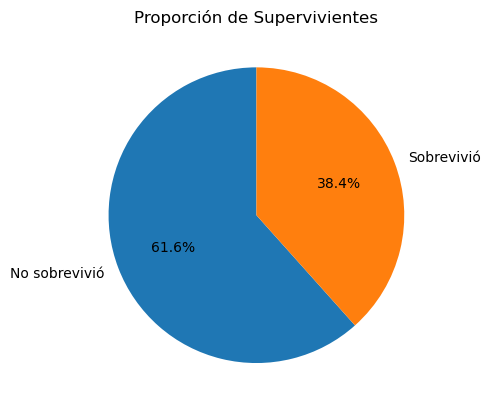

In [118]:
# Contar el número de pasajeros que sobrevivieron y que no sobrevivieron
survival_counts = df_train['Survived'].value_counts()
# Visualizar la proporción de sobrevivientes
print(survival_counts)
bplt.pie(survival_counts, labels=['No sobrevivió', 'Sobrevivió'], autopct='%1.1f%%', startangle=90)
bplt.title('Proporción de Supervivientes')
bplt.show()

Las etiquetas no están balanceadas, de hecho están muy desbalanceadas. En un gráfico se puede ver mejor:

% mujeres supervivientes: 74.20382165605095
% hombres supervivientes: 18.890814558058924
male      577
female    314
Name: Sex, dtype: int64


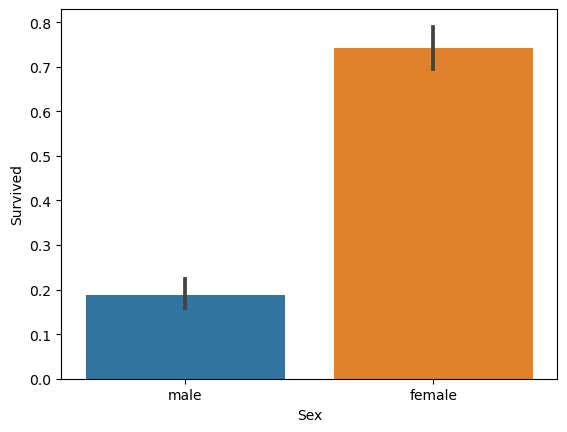

In [119]:
sns.barplot(x="Sex", y="Survived", data=df_train)

print("% mujeres supervivientes:", df_train["Survived"][df_train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("% hombres supervivientes:", df_train["Survived"][df_train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

print(df_train['Sex'].value_counts())

Las mujeres son más propensas a sobrevivir

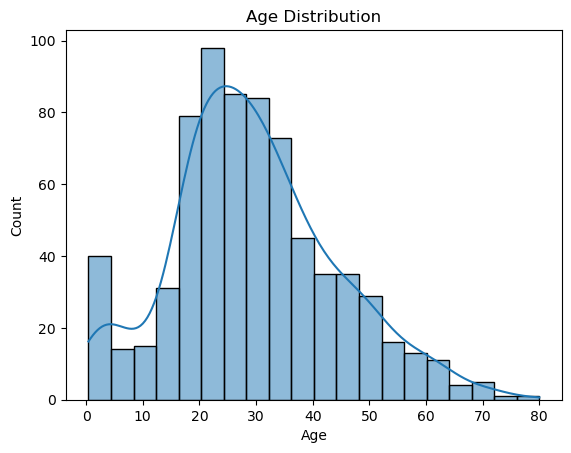

In [120]:
sns.histplot(data=df_train, x='Age', kde=True)
bplt.title('Age Distribution')
bplt.xlabel('Age')
bplt.ylabel('Count')
bplt.show()

In [121]:
fig = px.histogram(df_train, x='Age', color='Survived', title='Survival by Age',
                   marginal='box', barmode='group', color_discrete_sequence=['#ff7f0e', '#3498db'],
                   )

fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

# format the layout
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

fig.show()

Sobreviven más personas jóvenes, pero tampoco hay una gran diferencia.

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


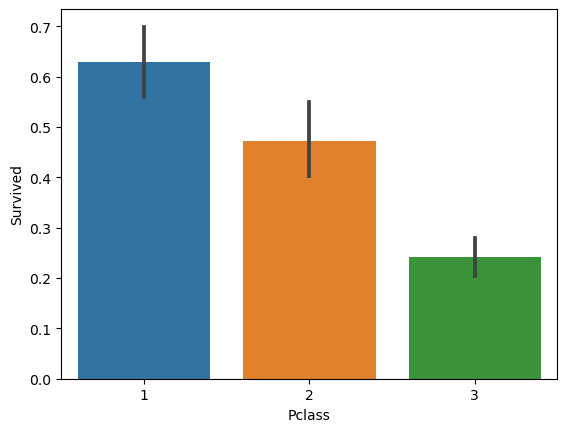

In [122]:
sns.barplot(x="Pclass", y="Survived", data=df_train)

print("% de Pclass = 1 supervivientes:", df_train["Survived"][df_train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("% de Pclass = 2 supervivientes:", df_train["Survived"][df_train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("% de Pclass = 3 supervivientes:", df_train["Survived"][df_train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Pclass: Sobreviven más los de 1º y 2º clase que los de 3º (lógico)

Percentage of Embarked = S who survived: 33.69565217391305
Percentage of Embarked = C who survived: 55.35714285714286
Percentage of Embarked = Q who survived: 38.961038961038966


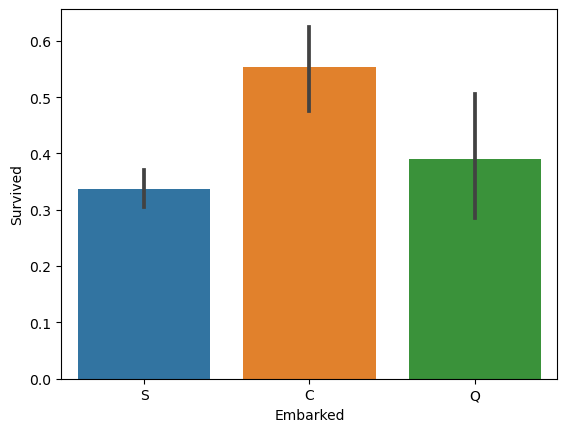

In [123]:
sns.barplot(x="Embarked", y="Survived", data=df_train)

print("% de Embarked = S supervivientes:", df_train["Survived"][df_train["Embarked"] == 'S'].value_counts(normalize = True)[1]*100)

print("% de Embarked = C supervivientes:", df_train["Survived"][df_train["Embarked"] == 'C'].value_counts(normalize = True)[1]*100)

print("% de Embarked = Q supervivientes:", df_train["Survived"][df_train["Embarked"] == 'Q'].value_counts(normalize = True)[1]*100)

Embarked: Sobreviven más los que embarcaron desde el puerto C.

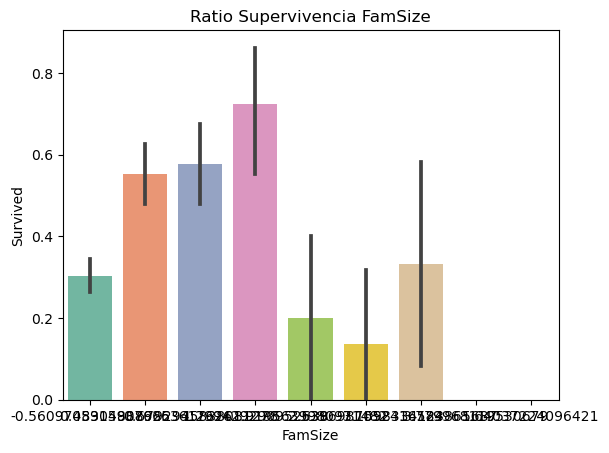

In [149]:
sns.barplot(data=df_train, x='FamSize', y='Survived', palette='Set2')
bplt.title('Ratio Supervivencia FamSize')
bplt.show()

FamSize: Las familias más pequeñas (1 a 4) eran más propensas a sobrevivir

### 3. Preprocesamiento de Datos ⚒️

In [125]:
df_train['Age'] = df_train.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))


imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imputed_column = imputer.fit_transform(df_train['Embarked'].values.reshape(-1, 1))

imputed_column = imputed_column.flatten()

df_train['Embarked'] = imputed_column

Relleno los NaNs de Age basándome en la mediana de grupos de pasajeros definidos por 'Sex' y 'Pclass'.

Relleno los NaNs de Embarked basándome en la moda.

In [126]:
from sklearn.preprocessing import StandardScaler

var_numericas = ['Pclass', 'Age', 'FamSize']
scaler = StandardScaler()

scaler.fit(df_train[var_numericas])

df_trainSC = scaler.transform(df_train[var_numericas])
df_train[var_numericas] = df_trainSC
df_train

,Survived,Pclass,Sex,Age,Embarked,FamSize
0,0,0.827,male,-0.535,S,0.059
1,1,-1.566,female,0.668,C,0.059
2,1,0.827,female,-0.234,S,-0.561
3,1,-1.566,female,0.443,S,0.059
4,0,0.827,male,0.443,S,-0.561
...,...,...,...,...,...,...
886,0,-0.369,male,-0.159,S,-0.561
887,1,-1.566,female,-0.761,S,-0.561
888,0,0.827,female,-0.572,S,1.299
889,1,-1.566,male,-0.234,C,-0.561


In [127]:
percent_nan_fila = df.isna().mean(axis = 0)
def print_percentage_nan(percentage_nan):
  #printeja l'informacio de % de nans de cada columna
  for col,percentage in percentage_nan.to_dict().items():
    print (col,percentage)
print_percentage_nan(percent_nan_fila)

PassengerId 0.0
Survived 0.0
Pclass 0.0
Name 0.0
Sex 0.0
Age 0.0
SibSp 0.0
Parch 0.0
Ticket 0.0
Fare 0.0
Cabin 0.7710437710437711
Embarked 0.002244668911335578


Teniu dades categoriques? Quina seria la codificació amb més sentit?

In [128]:
df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked'])

encoded = list(df_train.columns)
print("{} columnas despues de hacer one-hot encoding.".format(len(encoded)))
df_train.head()

9 total features after one-hot encoding.


,Survived,Pclass,Age,FamSize,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0.827,-0.535,0.059,0,1,0,0,1
1,1,-1.566,0.668,0.059,1,0,1,0,0
2,1,0.827,-0.234,-0.561,1,0,0,0,1
3,1,-1.566,0.443,0.059,1,0,0,0,1
4,0,0.827,0.443,-0.561,0,1,0,0,1


Si, concretamente Survived, Sex, Embarked, Pclass

In [ ]:
X_train = df_train.drop(['Survived'], axis=1)
y_train = df_train['Survived']

<AxesSubplot:>

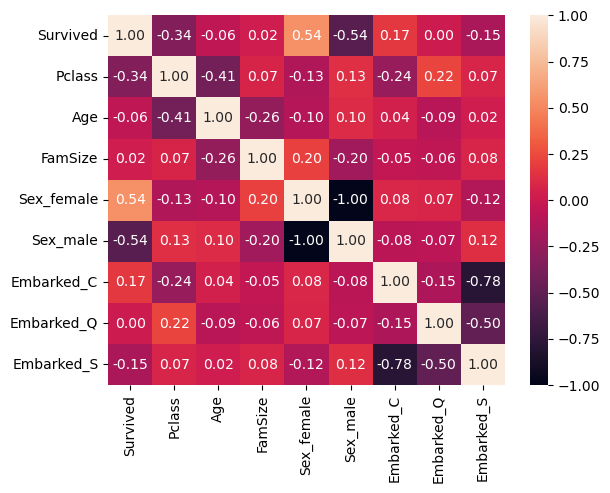

In [137]:

sns.heatmap(df_train.corr(),annot = True, fmt = ".2f")


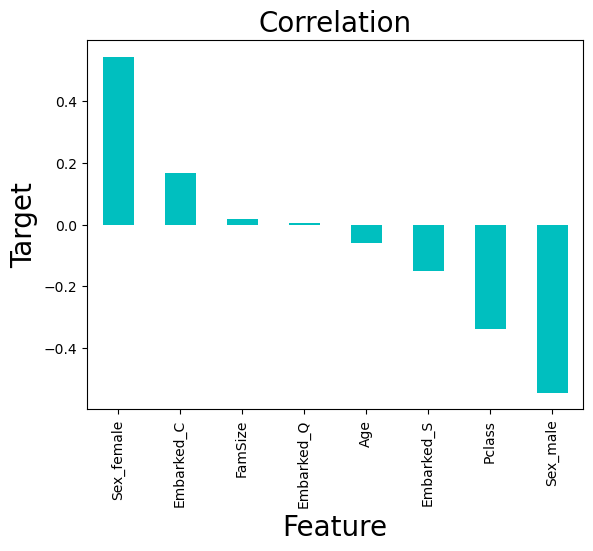

In [141]:


df_train.corr()['Survived'].sort_values(ascending = False).drop(['Survived']).plot(kind = 'bar', color = 'c')

bplt.xlabel('Columna', fontsize = 20)

bplt.ylabel('Objetivo', fontsize = 20)

bplt.title('Correlacion', fontsize = 20)

bplt.show()

## 4. Metric selection

Para nuestro problema escogeremos **f1-score** ya que  tiene en cuenta tanto la precisión como el recall, lo que convierte esta métrica en la + equilibrada para evaluar el rendimiento de nuestro modelo (tanto los verdaderos positivos como los verdaderos negativos son importantes)

In [145]:
def plot_f1_scores(classifiers, X_train, X_test, y_train, y_test):
    log_cols = ["Classifier", "F1-Score"]
    log = pd.DataFrame(columns=log_cols)
    f1_dict = {}

    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        if name in f1_dict:
            f1_dict[name] += f1
        else:
            f1_dict[name] = f1

    for clf in f1_dict:
        f1_dict[clf] = f1_dict[clf]
        log_entry = pd.DataFrame([[clf, f1_dict[clf]]], columns=log_cols)
        log = log.append(log_entry)

    plt.xlabel('F1-Score')
    plt.title('Clasificador F1-Score')

    sns.set_color_codes("muted")
    sns.barplot(x='F1-Score', y='Classifier', data=log.sort_values(by='F1-Score'), color="b")

In [148]:
classifiers = [
    ("Logistic Regression", LogisticRegression(random_state=42, max_iter= 1500, n_jobs=-1)),
    ("KNN", KNeighborsClassifier(n_neighbors=5, n_jobs=-1)),
    ("Gaussian Naive Bayes", GaussianNB()),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42, n_jobs =-1)),
    ("AdaBoost", AdaBoostClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
]

Abans de comencar a entrenar models, genereu una suite de funcions per poder analitzar graficament com esta anant el vostre model. Mostreu la Precisió-Recall Curve i la ROC Curve. Quina és més rellevant pel vostre dataset? Expliqueu amb les vostres paraules, la diferencia entre una i altre Pista

Què mostra classification_report? Quina métrica us fixareu per tal de optimitzar-ne la classificació pel vostre cas?

## Model Selection amb validacio creuada

Quins models heu considerat? Perque els heu seleccionat?

Fent servir validacio creuada, escolliu el millor model (agafant els hiperparamtres per defecte). Recordeu fer servir la metrica utilitzada en l'apartat anterior. Perque es important fer servir validacio creuada? Heu de fer servir algun tipus de validacio creuada en especial?

Seleccioneu una serie d'hyperparametres a provar per cadascun dels models i realitzeu una cerca d'hyperparametres. Hi ha algun model que creieu que podeu descartar de primeres? Perque?

Mostreu els resultats en una taula on es mostri el model, els experiments realitzats i els resultats obtinguts (tant en train com en test). Podeu mostrar tambe el temps d'entrenament de cada model.

Quin tipus de K-fold heu escollit en la seleccio de models? I en la seleccio de models amb hyperparametres? Com afecta al resultat modificar el numero de k (numero de folds) al resultat?

Quines formes de buscar el millor parametre heu trobat? Són costoses computacionalment parlant? documentació Quina heu seleccionat?

Si disposem de recursos limitats (per exemple, un PC durant 1 hora) quin dels métodes creieu que obtindrà millor resultat final?

Existeixen altres mètodes de búsqueda més eficients (scikit-optimize)?

Opcional : Feu la prova, i amb el model i el metode de crossvalidació escollit, configureu els diferents metodes de búsqueda per a que s'executin durant el mateix temps (i.e. depenent del problema, 0,5h-1 hora). Analitzeu quin ha arribat a una millor solució. (Ajuda: estimeu el temps que trigarà a fer 1 training el vostre model, i aixi trobeu el número de intents que podeu fer en cada cas.)

## Analisi Final

In [ ]:
dftest = pd.read_csv('test.csv')

Mostreu les curves ROC/PR (la que hageu escollit en l'apartat 2) i interpreteu els resultats.

Analitzeu en detall les diferents metriques que trobeu adients i comenteu per sobre com podrieu fer servir aquest model en un futur. Aixo es el que es coneix com un cas d'us.

Com creieu que es podria millorar el vostre model?